In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

%matplotlib inline

In [8]:
stocks = pd.read_csv('./stocks_cyc.csv', index_col=0)

In [9]:
stocks.shape

(1978023, 8)

In [10]:
stocks.isnull().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Ex-Dividend     False
Split Ratio     False
company_name    False
dtype: bool

In [11]:
#403 splits out of ~2 million observations
np.sum(stocks['Split Ratio'] != 1)

403

## Creating the overall market movements

In [13]:
aggregate = stocks.reset_index()
grouped_agg = aggregate.groupby('Date').mean()
grouped_agg['company_name'] = 'aggregate_market'
for_corr = grouped_agg[['Close']]

In [14]:
#there are going to be some null values
pd.isnull(for_corr.join(stocks.loc[stocks['company_name'] == 'AAPL'], lsuffix='x', rsuffix='y')).any(axis=1).nonzero()

(array([4348, 4427]),)

In [15]:
corrs = []
for company in tqdm(stocks.company_name.unique().tolist()):
    subset = stocks.loc[stocks['company_name'] == company]
    joined = for_corr.join(subset, lsuffix='x', rsuffix='y').dropna()
    correlation = np.corrcoef(joined['Closex'].values, joined['Closey'].values)[0,1]
    corrs.append(correlation)
    
df_corr = pd.DataFrame()
df_corr['Company'] = stocks.company_name.unique().tolist()
df_corr['Correlation'] = corrs

100%|██████████| 469/469 [01:11<00:00,  6.52it/s]


Text(0.5,0,'Correlation with market movements')

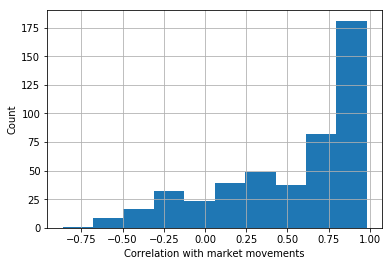

In [19]:
#most companies are positively correlated with market movements (I want the negative ones)
df_corr.Correlation.hist()
plt.ylabel("Count")
plt.xlabel("Correlation with market movements")

In [18]:
df_corr.sort_values(by='Correlation').head(10)

,Company,Correlation
424,UA,-0.864294
6,ADT,-0.588572
172,FTR,-0.583666
390,SPLS,-0.574065
160,FSLR,-0.568100
334,PBI,-0.538448
206,HCBK,-0.537721
287,MUR,-0.523867
54,BAC,-0.521657
149,EXC,-0.507362
